In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
savedir = "saved_models/"
plotdir = "plots/"

In [3]:
beta = np.load("data/beta.npy")
Nbeta = len(beta)

In [4]:
vars_by_beta = [np.load(savedir+'variables_beta_indx_{0}.npy'.format(ii)) for ii in range(Nbeta)]

In [5]:
weights_by_beta = [v[-1]['weights'] for v in vars_by_beta]
hidden_bias_by_beta = [v[-1]['hidden_bias'] for v in vars_by_beta]
visible_bias_by_beta = [v[-1]['visible_bias'] for v in vars_by_beta]

In [6]:
hidden_bias = np.squeeze(np.asarray(hidden_bias_by_beta))
visible_bias = np.squeeze(np.asarray(visible_bias_by_beta))
L = visible_bias.shape[1]

### Look at the trained weights

In [7]:
plt.rc('text', usetex=True)

In [8]:
plt.rc('font',family='serif')
plt.rc('font',serif=[])

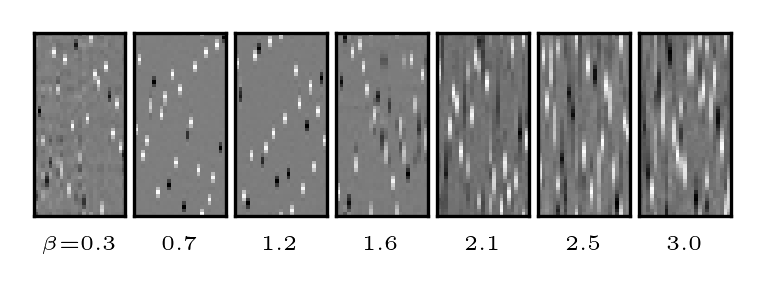

In [176]:
cmap='binary'
beta_indices = list(range(1, Nbeta, 3))
Nplot = len(beta_indices)

fig, axes = plt.subplots(1, Nplot, figsize=(3,3),dpi=300)

for ii in range(Nplot):
    ax = axes[ii]
    bi = beta_indices[ii]
    w=(weights_by_beta[bi])
    ax.imshow(w, origin='lower',cmap=cmap)
    label = "{0:.1f}".format(beta[bi])
    if ii == 0:
        label = r"$\beta$=" + label
    ax.set_xlabel(label,fontsize=5)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_axis_off()
plt.subplots_adjust(wspace=0.1, hspace=0.0)
fig.savefig(plotdir+"weights_examples.png", bbox_inches='tight')

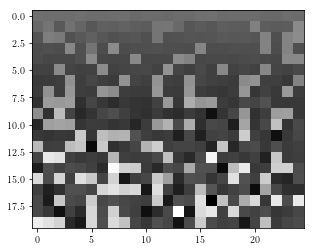

In [122]:
plt.imshow(hidden_bias, cmap='binary')

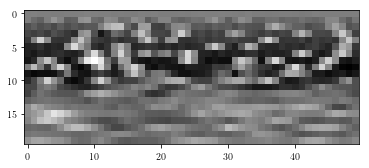

In [116]:
plt.imshow(visible_bias, cmap='binary')

In [ ]:
cmap='binary'
beta_indices = list(range(1, Nbeta, 3))
Nplot = len(beta_indices)

fig, axes = plt.subplots(1, Nplot, figsize=(3,3),dpi=300)

for ii in range(Nplot):
    ax = axes[ii]
    bi = beta_indices[ii]
    w=(weights_by_beta[bi])
    ax.imshow(w, origin='lower',cmap=cmap)
    label = "{0:.1f}".format(beta[bi])
    if ii == 0:
        label = r"$\beta$=" + label
    ax.set_xlabel(label,fontsize=5)
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.set_axis_off()
plt.subplots_adjust(wspace=0.1, hspace=0.0)
fig.savefig(savedir+"weights_examples.png")

In [171]:
from scipy.optimize import curve_fit

def get_exp_params(w):

    
    def f(x, y0, x0, A, k):
        return A * np.exp(-np.abs(x-x0) * k) + y0
    x = list(range(L))

    params_all = []
    for ii in range(w.shape[1]):
        r = w[:,ii]
        p0 = (np.mean(r), np.where(np.abs(r)==np.max(np.abs(r)))[0][0], 5, 1)
        try:
            params_all.append(curve_fit(f, x, r,p0=p0)[0])
        except RuntimeError:
            print("skipping", ii)
    params_all = np.asarray(params_all)
    return params_all


In [172]:
params_by_beta = [get_exp_params(w) for w in weights_by_beta]

/home/brian/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/brian/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp
  import sys


In [164]:
mean_params = np.mean(params_by_beta, axis=1)
sig_params = np.std(params_by_beta, axis=1)

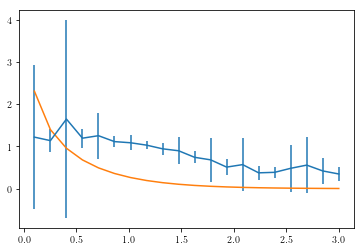

In [174]:
plt.errorbar(beta, mean_params[:,-1], sig_params[:,-1])
plt.plot(beta, np.log(np.cosh(beta) / np.sinh(beta)))

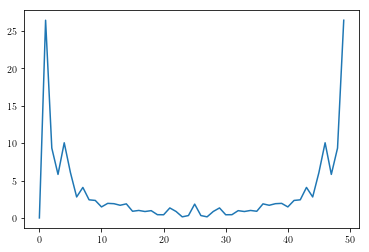

In [106]:
plt.plot(np.abs(np.fft.fft(w[:,2]-np.mean(w[:,2]))))